In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [32]:
# Load the CSV file into a DataFrame
df = pd.read_csv('traffic.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates (if any)
df.dropna(subset=['Date'], inplace=True)

# Sort DataFrame by date
df.sort_values(by='Date', inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Display the cleaned DataFrame
print(df.head())


            Visits
Date              
2020-01-01  1554.0
2020-01-02  2820.0
2020-01-03  2970.0
2020-01-04  2111.0
2020-01-05  2393.0


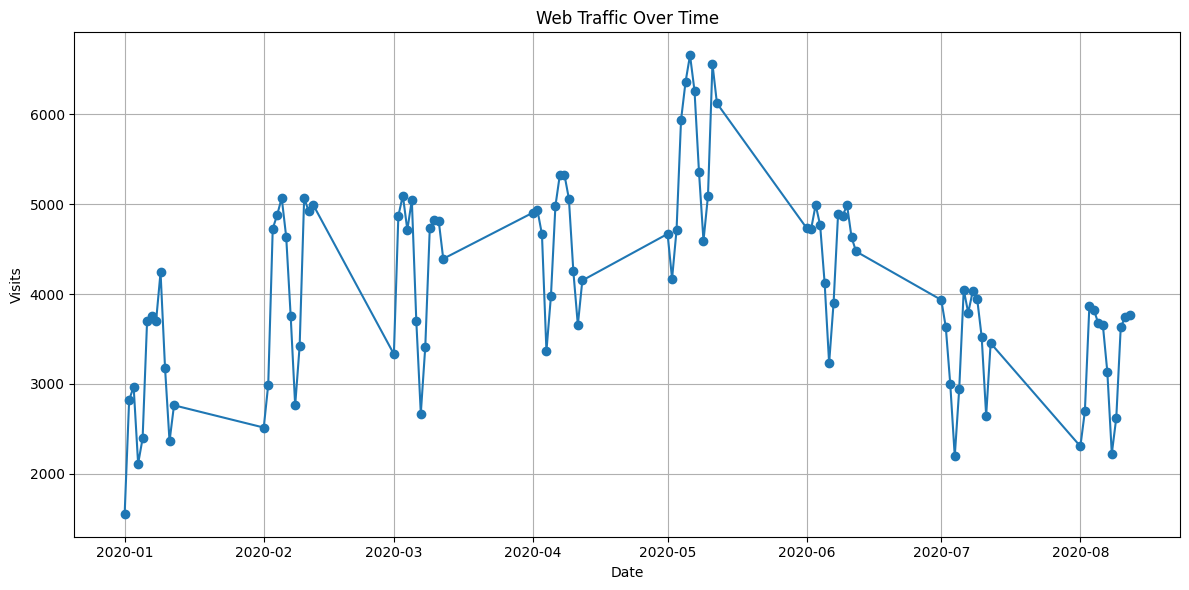

In [33]:
# Plotting the web traffic data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Visits'], marker='o', linestyle='-')
plt.title('Web Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
from statsmodels.tsa.stattools import adfuller 
# Function to perform Dickey-Fuller test for stationarity
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Perform Augmented Dickey-Fuller test
print('Augmented Dickey-Fuller Test:')
adf_test(df['Visits'])


Augmented Dickey-Fuller Test:
ADF Statistic: -3.401795390314081
p-value: 0.010897818932954197
Critical Values:
	1%: -3.502704609582561
	5%: -2.8931578098779522
	10%: -2.583636712914788


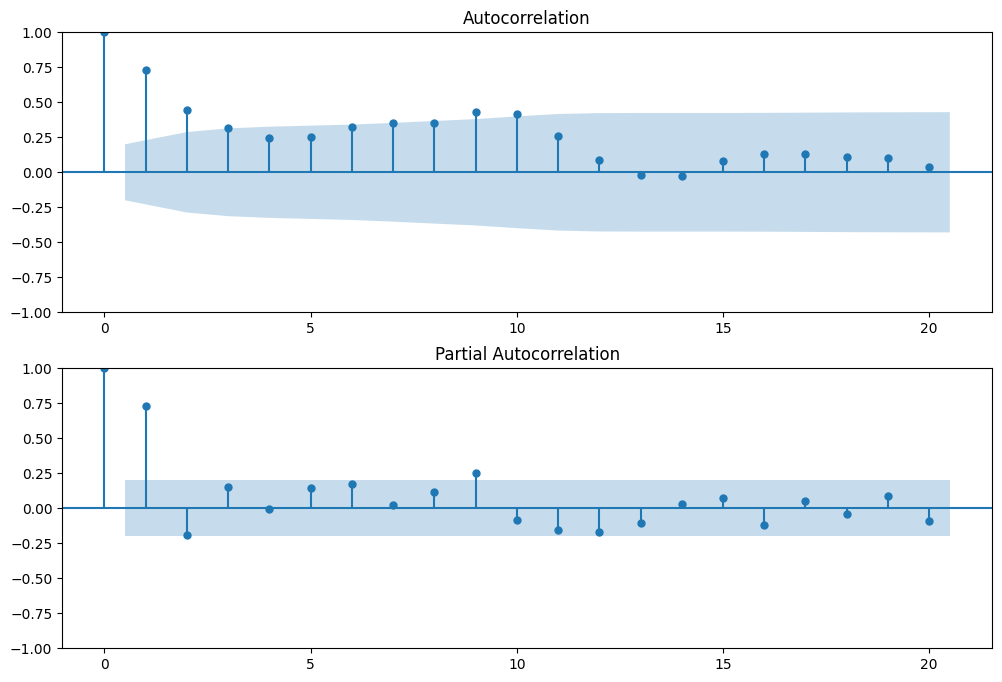

In [35]:
# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Visits'], lags=20, ax=ax1)
plot_pacf(df['Visits'], lags=20, ax=ax2)
plt.show()


In [36]:
# Split into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [37]:
from statsmodels.tsa.arima.model import ARIMA
# Build ARIMA model
model = ARIMA(train['Visits'], order=(1, 1, 1))  # Example order, adjust as needed

# Fit model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 Visits   No. Observations:                   76
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -600.036
Date:                Sat, 13 Jul 2024   AIC                           1206.072
Time:                        17:45:15   BIC                           1213.025
Sample:                             0   HQIC                          1208.848
                                 - 76                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7461      0.078     -9.606      0.000      -0.898      -0.594
ma.L1          0.9998      0.176      5.668      0.000       0.654       1.345
sigma2      5.049e+05   3.51e-07   1.44e+12      0.0

c:\Users\deeps\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\deeps\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\deeps\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\deeps\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\deeps\AppData\Local\Temp\ipykernel_11312\3185669982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast'] = forecast


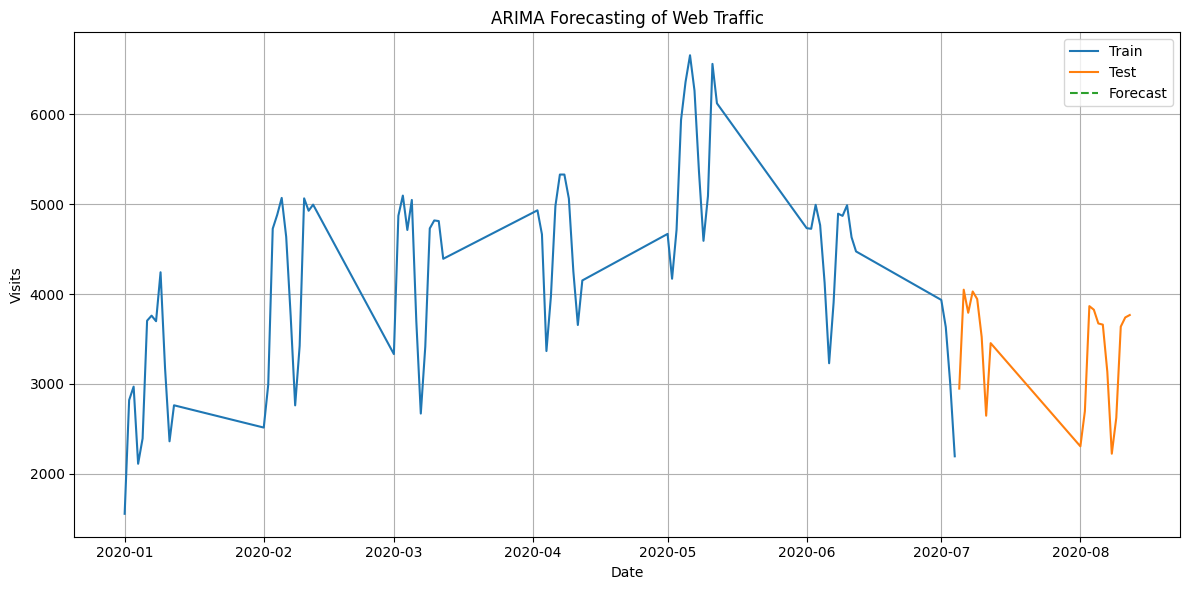

In [39]:
forecast = model_fit.forecast(steps=len(test))

# Add forecasted values to DataFrame
test['Forecast'] = forecast

# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Visits'], label='Train')
plt.plot(test.index, test['Visits'], label='Test')
plt.plot(test.index, test['Forecast'], label='Forecast', linestyle='--')
plt.title('ARIMA Forecasting of Web Traffic')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
